In [37]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import dtreeviz.trees as dtreeviz
import sklearn as sk
import pickle
from collections import defaultdict

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
import plotly.graph_objects as go


#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
ds_hotels = pd.read_csv("https://drive.google.com/u/1/uc?id=12Ozzs_9Xb8BEUT0Jb4T1G3zyQ8vNMwWN&export=download")
ds_test = pd.read_csv("https://drive.google.com/u/1/uc?id=12gG9w6VEdOQbzCpGucTo2QOUtDPNbcsh&export=download")

# CHECKPOINT 3

In [3]:
#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
ds_modificado_ch3 = pd.read_csv('ds_hotels_train_modificado.csv')


In [5]:
ds_test_ch3 = pd.read_csv('ds_hotels_test_modificado.csv')

In [6]:
target='is_canceled'
ds_modificado_ch3[target].value_counts(normalize=True)*100
columnas_eliminar_NANs=['id']
ds_modificado_ch3.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
columnas_eliminar_NANs=['reservation_status_date','country']
ds_modificado_ch3.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_modificado_ch3.loc[:,"hotel"].replace(to_replace=["Resort Hotel","City Hotel"],value=[0,1],inplace=True)
ds_modificado_ch3.loc[:,"reserved_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)
ds_modificado_ch3.loc[:,"assigned_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)
#One hot encoding para variables categoricas
ds_modificado_ch3 = pd.get_dummies(ds_modificado_ch3, columns=["deposit_type","customer_type","meal","market_segment","distribution_channel"], drop_first=True)
ds_modificado_ch3.head()
ds_modificado_ch3.loc[:,"arrival_date_month"].replace(to_replace=["January","February","March","April","May","June","July","August","September",
 'October','November','December'],value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)



In [7]:
x_ds_test = ds_test_ch3.copy()

columnas_eliminar_NANs=['id','company']
x_ds_test.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
columnas_eliminar_NANs=['reservation_status_date','country']
x_ds_test.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
x_ds_test.loc[:,"hotel"].replace(to_replace=["Resort Hotel","City Hotel"],value=[0,1],inplace=True)
x_ds_test.loc[:,"reserved_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)
x_ds_test.loc[:,"assigned_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)
#One hot encoding para variables categoricas
x_ds_test = pd.get_dummies(x_ds_test, columns=["deposit_type","customer_type","meal","market_segment","distribution_channel"], drop_first=True)
x_ds_test.head()
x_ds_test.loc[:,"arrival_date_month"].replace(to_replace=["January","February","March","April","May","June","July","August","September",
 'October','November','December'],value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [8]:
# clasifico sin las variables categóricas
columnas_con_numeros = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults', 'children', 'babies', 'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

In [9]:
#Creo un dataset con los features que voy a usar para clasificar
ds_modificado_ch3_x_num = ds_modificado_ch3[columnas_con_numeros]

x_ds_test_numerico = x_ds_test[columnas_con_numeros]

#Creo un dataset con la variable target
ds_modificado_ch3_y = ds_modificado_ch3['is_canceled'].copy()

In [10]:
#Genero los conjuntos de train y de test
x_train_num, x_test_num, y_train, y_test = train_test_split(ds_modificado_ch3_x_num,
                                                    ds_modificado_ch3_y, 
                                                    test_size=0.2, 
                                                    random_state=1) #semilla)

In [11]:
#Creo un dataset con los features que voy a usar para clasificar
ds_modificado_ch3_x = ds_modificado_ch3.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_modificado_ch3_y = ds_modificado_ch3['is_canceled'].copy()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(ds_modificado_ch3_x,
                                                    ds_modificado_ch3_y, 
                                                    test_size=0.2, 
                                                    random_state=1) #semilla)

CLASIFICADOR KNN

In [28]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [20]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  8921
total:  12382


In [21]:
accuracy_score(y_test,y_pred)

0.7204813438862866

In [22]:
# Variamos la cantidad de vecinos (K)

metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, 100) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:
    print(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyboardInterrupt: 

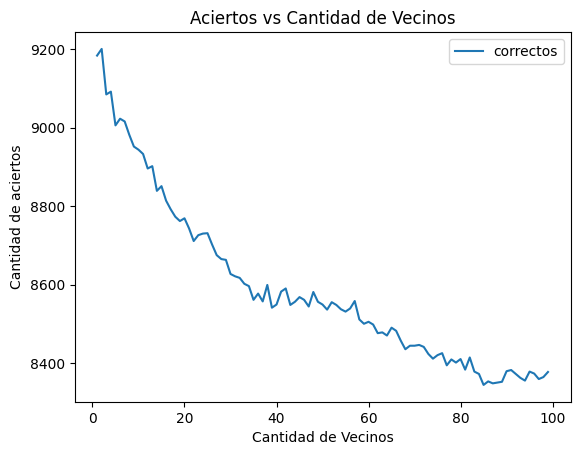

In [ ]:
# ploteamos

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Vuelvo a analizar para > 100 vecinos

In [ ]:
# Variamos la cantidad de vecinos (K)

metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(100, 200) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:
    print(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


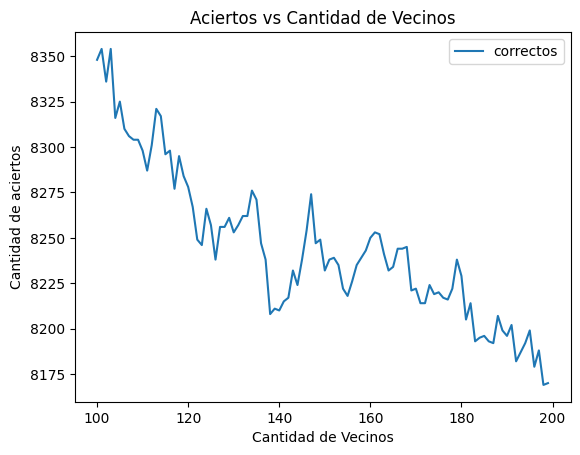

In [ ]:
# ploteamos

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Se observa que al aumentar la cantidad de vecinos, disminuye la cantidad de aciertos

k-fold cross validation parámetros

Analizo la cantidad de vecinos óptima

In [23]:
from sklearn.model_selection import cross_val_score

k_range=range(1,30) #canidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

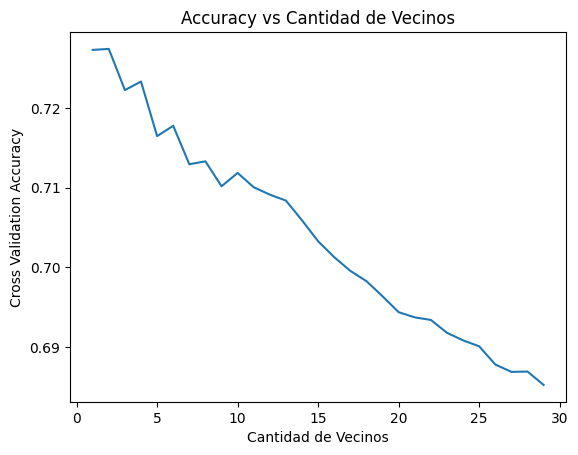

In [24]:
#ploteamos accuracy vs cantidad de vecinos
plt.plot(k_range, k_scores)
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy vs Cantidad de Vecinos')
plt.show()

Vuelvo a analizar para una cantidad mayor a 30

In [ ]:
from sklearn.model_selection import cross_val_score

k_range=range(25,45) #canidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

KeyboardInterrupt: 

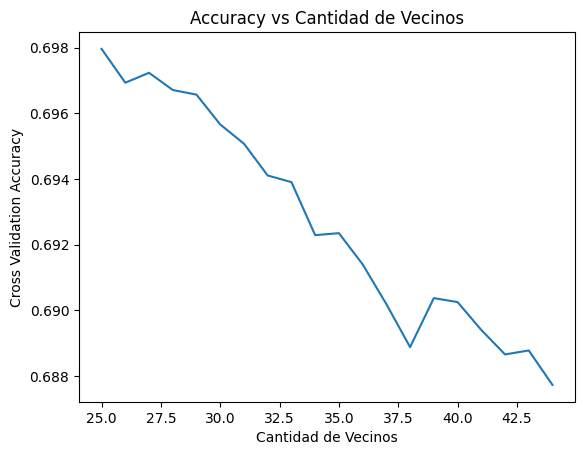

In [ ]:
#ploteamos accuracy vs cantidad de vecinos
plt.plot(k_range, k_scores)
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy vs Cantidad de Vecinos')
plt.show()

Nuevamente, se observa que al aumentar la cantidad de vecinos, disminuye el accuracy

Optimizacion parámetros

In [25]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.75100465, 0.73119719, 0.70949193, 0.6863324 , 0.74512887,
       0.72849157, 0.71397424, 0.74082826, 0.75595139, 0.73991946])

In [26]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'brute'}
0.7559513913827132


In [27]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.7544823130350509

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6207
           1       0.75      0.76      0.76      6175

    accuracy                           0.75     12382
   macro avg       0.75      0.75      0.75     12382
weighted avg       0.75      0.75      0.75     12382



Text(50.722222222222214, 0.5, 'True')

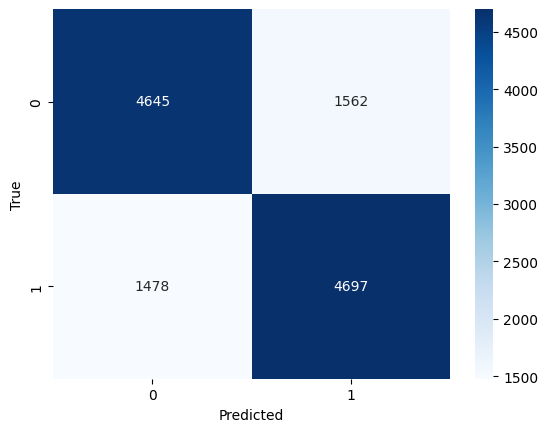

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Hago una predicción con el conjunto de test

In [29]:
x_ds_test.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,0,1,277,2016,11,46,7,1,2,2,...,False,False,False,False,True,False,False,False,False,True
1,1,1,286,2016,5,20,11,0,4,2,...,False,False,False,False,True,False,False,False,False,True
2,2,1,0,2016,8,35,23,0,1,3,...,False,False,False,False,False,False,True,False,False,True
3,3,0,196,2016,10,44,29,2,5,2,...,False,False,False,False,False,False,True,False,False,True
4,4,0,232,2016,11,48,26,2,1,2,...,False,False,False,False,True,False,False,False,False,True


In [33]:
#Predicción con mejor estimador
y_prediccion=best_knn.predict(x_ds_test_numerico)


              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6207
           1       0.75      0.76      0.76      6175

    accuracy                           0.75     12382
   macro avg       0.75      0.75      0.75     12382
weighted avg       0.75      0.75      0.75     12382



Text(50.722222222222214, 0.5, 'True')

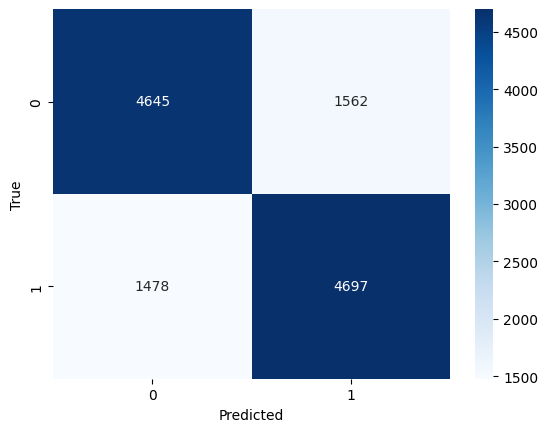

In [34]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7774995961880149
Recall: 0.8105263157894737
Precision: 0.7594840667678301
f1 score: 0.7841754798276538


Guardo la predicción

In [14]:
def guardar_prediccion(y_prediccion, ds_test, name):
    sub = pd.DataFrame(ds_test['id'])
    submition=pd.DataFrame(y_prediccion)
    submition.rename(columns={0: "is_canceled"})
    sub["is_canceled"]= submition
    sub.to_csv(name, index=False)

In [ ]:
guardar_prediccion(y_prediccion, ds_test_ch3, "predict_knn.csv")

In [13]:
def guardar_modelo(model, filename):
    # save the model to disk
    pickle.dump(model, open(filename, 'wb'))

In [ ]:
guardar_modelo(best_knn, 'best_knn.sav')

# Clasificador SVM

Importo las librerías

In [16]:
from sklearn.svm import SVC

In [ ]:
# Estos son los conjuntos de test y entrenamiento
# x_train, x_test, y_train, y_test

# Voy a predecir sobre: x_ds_test

In [41]:
#Construyo un modelo SVM  
svm = SVC()

#Lo entreno con los datos sin escalar
svm.fit(x_train_num, y_train)

#Hago la prediccion y calculo las métricas
y_pred=svm.predict(x_test_num)


In [15]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      6207
           1       0.65      0.55      0.59      6175

    accuracy                           0.63     12382
   macro avg       0.63      0.63      0.62     12382
weighted avg       0.63      0.63      0.62     12382



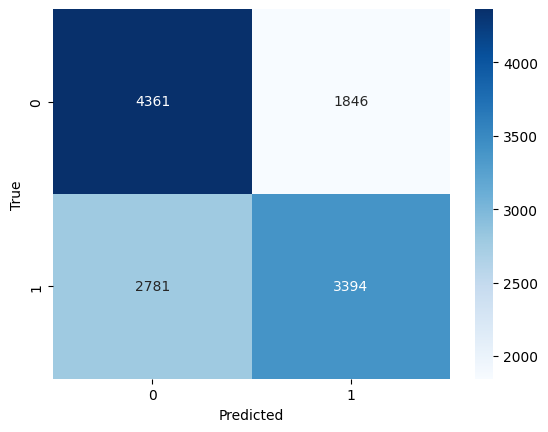

In [43]:
metricas(y_pred,y_test)

In [44]:
guardar_modelo(svm, 'SVM.sav')

In [45]:
y_pred=svm.predict(x_ds_test_numerico)

In [46]:
guardar_prediccion(y_pred, ds_test_ch3, "predict_SVM.csv")

Ahora varío el kernel

In [78]:
from sklearn import preprocessing

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test)
x_ds_test_minmax = min_max_scaler.transform(x_ds_test)

Kernel LINEAL

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6207
           1       0.80      0.73      0.76      6175

    accuracy                           0.77     12382
   macro avg       0.78      0.77      0.77     12382
weighted avg       0.78      0.77      0.77     12382



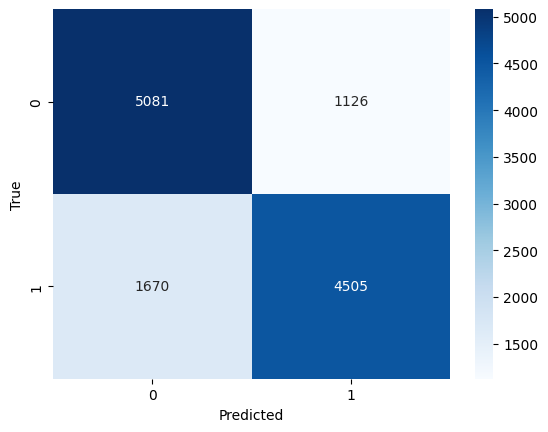

In [22]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin=clf.predict(x_test_minmax)
metricas(y_pred_lin,y_test)

In [23]:
guardar_modelo(clf, 'SVC_lineal.sav')

Hago una prediccion sobre el conjunto de test

In [27]:
y_pred=clf.predict(x_ds_test_minmax)

In [28]:
guardar_prediccion(y_pred, ds_test_ch3, "predict_SVC_lineal.csv")

In [ ]:
x_train_minmax

array([[0.        , 0.18430034, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.10409556, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.27645051, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.00511945, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.01194539, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.03754266, 0.        , ..., 1.        , 0.        ,
        0.        ]])

No lo pude correr, llevó más de 45min y no terminó.

Kernel POLINOMICO

In [79]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados min-max
svc_pol = SVC(kernel='poly', C=5, degree=10, gamma=10, coef0=10)
svc_pol.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_pol=svc_pol.predict(x_test_minmax)
metricas(y_pred_pol,y_test)

In [ ]:
guardar_modelo(svc_pol, 'SVC_polinomico.sav')

In [ ]:
x_ds_test_numerico_minmax = min_max_scaler.transform(x_ds_test_numerico)
y_pred_pol=svc_pol.predict(x_ds_test_minmax)


In [ ]:
guardar_prediccion(y_pred_pol, ds_test_ch3, "predict_SVC_polinomico.csv")

Kernel RADIAL

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      6207
           1       0.79      0.77      0.78      6175

    accuracy                           0.78     12382
   macro avg       0.78      0.78      0.78     12382
weighted avg       0.78      0.78      0.78     12382



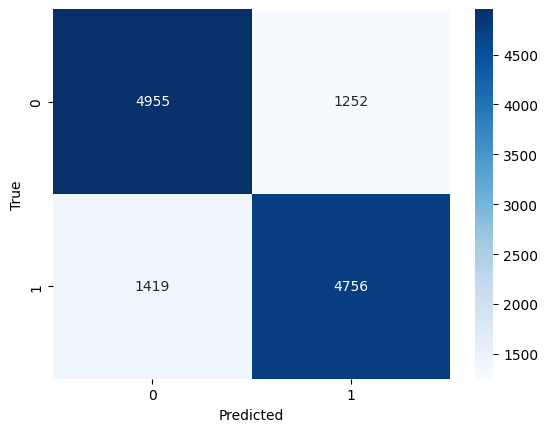

In [29]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
svc_rad = SVC(kernel='rbf', C=5, gamma=10)
svc_rad.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad=svc_rad.predict(x_test_minmax)
metricas(y_pred_rad,y_test)

In [30]:
guardar_modelo(svc_rad, 'SVC_radial.sav')

In [31]:
y_pred_rad=svc_rad.predict(x_ds_test_minmax)

In [32]:
guardar_prediccion(y_pred_rad, ds_test_ch3, "predict_SVC_radial.csv")

RANDOM FOREST

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Armo un clasificador Random Forest y busco los mejores parámetros con KFOLD

In [35]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=40 

#Conjunto de parámetros que quiero usar
params_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }
                
#Cantidad de splits para el Cross Validation
folds=7

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = RandomForestClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [10, 20, 50]},
                   scoring=make_scorer(f1_score))

In [36]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
0.8405813169687887


In [37]:
best_rf = randomcv.best_estimator_

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6207
           1       0.87      0.82      0.84      6175

    accuracy                           0.85     12382
   macro avg       0.85      0.85      0.85     12382
weighted avg       0.85      0.85      0.85     12382



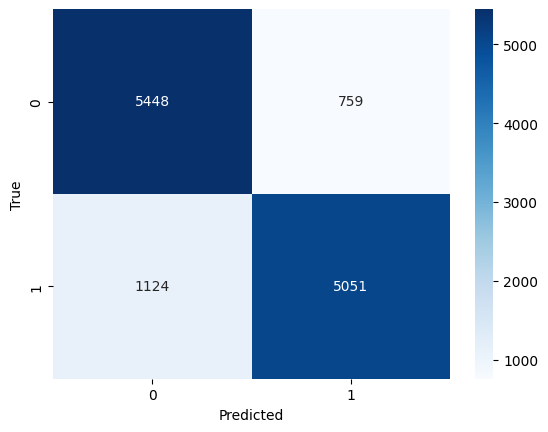

In [38]:
y_pred_rf = best_rf.predict(x_test)
metricas(y_pred_rf,y_test)

In [39]:
guardar_modelo(best_rf, 'RF.sav')

In [40]:
y_pred_rf=best_rf.predict(x_ds_test)

In [41]:
guardar_prediccion(y_pred_rf, ds_test_ch3, "predict_RF.csv")

# Clasificador XGBoost

In [49]:
import xgboost as xgb


In [74]:
#Creo el modelo y lo entreno

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100,)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

AUC: 0.9220804511557736
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6207
           1       0.86      0.82      0.84      6175

    accuracy                           0.84     12382
   macro avg       0.84      0.84      0.84     12382
weighted avg       0.84      0.84      0.84     12382



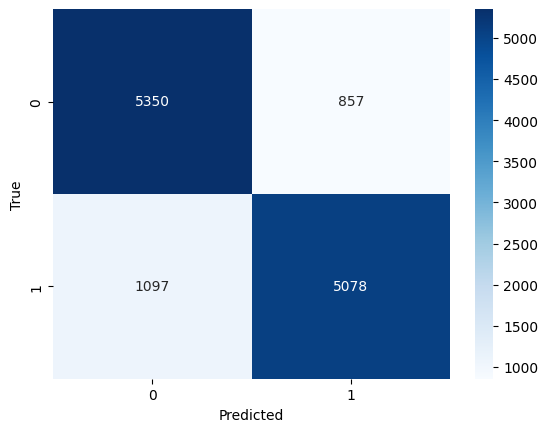

In [75]:
from sklearn.metrics import roc_auc_score

#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)
metricas(y_pred,y_test)


In [60]:
#Datos de entrenamiento en formaro DMatrix
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

#Entreno CV para probar el learning rate
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.856833,0.001142,0.854958,0.003755
1,0.858493,0.001221,0.856883,0.003705
2,0.863623,0.000759,0.861950,0.004348
3,0.865173,0.001938,0.863434,0.003913
4,0.867512,0.001318,0.865763,0.003708
5,0.868485,0.001176,0.866498,0.004049
6,0.869780,0.001017,0.867714,0.004213
7,0.872628,0.000937,0.870379,0.004107


In [61]:
#Entreno CV para probar el learning rate mas alto
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.2},num_boost_round=8,metrics='auc',seed=0)
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.856833,0.001142,0.854958,0.003755
1,0.863425,0.001033,0.861798,0.004125
2,0.867941,0.000859,0.866033,0.004484
3,0.870855,0.001872,0.869115,0.003712
4,0.875349,0.001787,0.873363,0.003590
5,0.878501,0.001558,0.876102,0.004089
6,0.881330,0.001159,0.878675,0.004213
7,0.883563,0.001283,0.880471,0.004248


In [24]:
guardar_modelo(xgb_model, 'XGBoost.sav')

In [25]:
y_pred_xgb=xgb_model.predict(x_ds_test)

In [26]:
guardar_prediccion(y_pred_xgb, ds_test_ch3, "predict_XGBoost.csv")

# Ensamble híbrido Voting

In [16]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
"""
file = open("best_knn.sav",'rb')
knn = pickle.load(file)

file = open("SVC_lineal.sav",'rb')
svc_lineal = pickle.load(file)

file = open("SVC_radial.sav",'rb')
svc_radial = pickle.load(file)
"""

In [25]:
#Creo clasificadores

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
xgb = xgb.XGBClassifier(random_state=0, n_estimators=100)

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('xgb', xgb)], voting = 'hard')

#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
y_pred = vot_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8437247617509288

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      6207
           1       0.87      0.81      0.84      6175

    accuracy                           0.84     12382
   macro avg       0.84      0.84      0.84     12382
weighted avg       0.84      0.84      0.84     12382



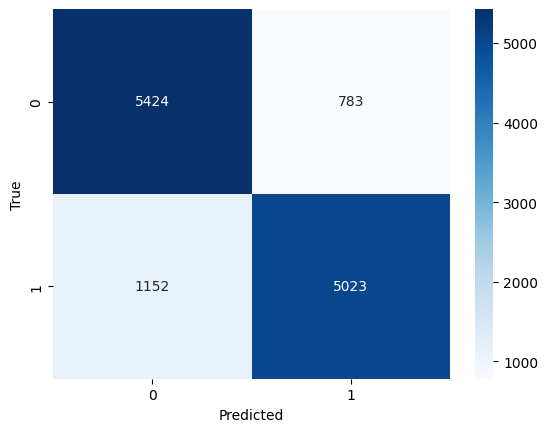

In [26]:
metricas(y_pred,y_test)

In [27]:
guardar_modelo(vot_clf, 'voting2.sav')

In [28]:
y_pred_voting1=vot_clf.predict(x_ds_test)

In [29]:
guardar_prediccion(y_pred_voting1, ds_test_ch3, "predict_voting2.csv")

# Ensamble híbrido Stacking

In [33]:


#Modelos Base
base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]

#Meta Modelo
meta_model = LogisticRegressionCV()

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [34]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores

In [38]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [41]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train,y_train)
y_pred_st = stacking_model.predict(x_test)
accuracy_score(y_test, y_pred_st)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


0.7386528832175739

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6207
           1       0.76      0.70      0.73      6175

    accuracy                           0.74     12382
   macro avg       0.74      0.74      0.74     12382
weighted avg       0.74      0.74      0.74     12382



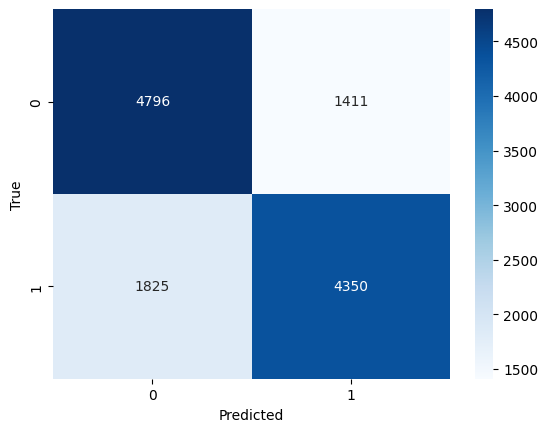

In [42]:
metricas(y_pred_st,y_test)

In [43]:
guardar_modelo(stacking_model, 'stacking.sav')

In [44]:
y_pred_stacking=stacking_model.predict(x_ds_test)

In [45]:
guardar_prediccion(y_pred_stacking, ds_test_ch3, "predict_stacking.csv")